In [ ]:
from zipfile import ZipFile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

import PIL

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TRAIN_ARCHIVE = '/content/drive/MyDrive/Дипломна_робота/CASIA-HWDB_Train.zip'
TEST_ARCHIVE  = '/content/drive/MyDrive/Дипломна_робота/CASIA-HWDB_Test.zip'

In [ ]:
! ls /content/drive/MyDrive/Дипломна_робота

 best_model_pool_2_15.keras   best_model_tuning.keras   model_dense_1.keras
 best_model_pool_2_30.keras   CASIA-HWDB_Test.zip       model_pool.keras
 best_model_pool_2.keras      CASIA-HWDB_Train.zip      model_tuning.keras
 best_model_pool_70.keras     model_conv_c.keras       'Дипломна робота.ipynb'
 best_model_pool.keras	      model_conv.keras


# Create info tables

In [ ]:
# Create a dictionary (character_zip) that maps each unique folder in the archive to a unique integer ID.

with ZipFile(TRAIN_ARCHIVE, 'r') as archive:
  all_files = archive.namelist()

  labels = sorted({file.split('/')[0] for file in all_files if '/' in file})
  nums   = range(0, len(labels))

  character_zip = dict(zip(nums, labels))

print(character_zip)

{0: '一', 1: '七', 2: '三', 3: '上', 4: '下', 5: '不', 6: '东', 7: '么', 8: '九', 9: '习', 10: '书', 11: '买', 12: '了', 13: '二', 14: '五', 15: '些', 16: '亮', 17: '人', 18: '什', 19: '今', 20: '他', 21: '们', 22: '会', 23: '住', 24: '作', 25: '你', 26: '候', 27: '做', 28: '儿', 29: '先', 30: '八', 31: '六', 32: '关', 33: '兴', 34: '再', 35: '写', 36: '冷', 37: '几', 38: '出', 39: '分', 40: '前', 41: '北', 42: '医', 43: '十', 44: '午', 45: '去', 46: '友', 47: '吃', 48: '同', 49: '名', 50: '后', 51: '吗', 52: '呢', 53: '和', 54: '哪', 55: '商', 56: '喂', 57: '喜', 58: '喝', 59: '四', 60: '回', 61: '国', 62: '在', 63: '坐', 64: '块', 65: '多', 66: '大', 67: '天', 68: '太', 69: '她', 70: '好', 71: '妈', 72: '姐', 73: '子', 74: '字', 75: '学', 76: '客', 77: '家', 78: '对', 79: '小', 80: '少', 81: '岁', 82: '工', 83: '师', 84: '年', 85: '店', 86: '开', 87: '影', 88: '很', 89: '怎', 90: '想', 91: '我', 92: '打', 93: '日', 94: '时', 95: '明', 96: '星', 97: '昨', 98: '是', 99: '月', 100: '有', 101: '朋', 102: '服', 103: '期', 104: '本', 105: '机', 106: '来', 107: '杯', 108: '果', 109: '校', 110: '样',

In [ ]:
len(character_zip)

172

In [ ]:
def create_table(directory: str, character_zip: dict):
    with ZipFile(directory, 'r') as archive:
        all_files = archive.namelist()

        data = []

        for file in all_files:
            folder = file.split('/')[0]

            character_id = next((key for key, value in character_zip.items() if value == folder), None)

            if character_id is not None and (file.endswith('.png') or file.endswith('.jpg')):
                file_name = file.split('/')[-1]

                data.append([character_id, folder, file_name])

        df = pd.DataFrame(data, columns=["Character_ID", "Character", "File_Name"])

    return df

In [ ]:
train_set = create_table(TRAIN_ARCHIVE, character_zip)
test_set  = create_table(TEST_ARCHIVE, character_zip)

In [ ]:
display(train_set, test_set)

,Character_ID,Character,File_Name
0,1,七,1.png
1,1,七,10.png
2,1,七,100.png
3,1,七,101.png
4,1,七,102.png
...,...,...,...
102937,0,一,95.png
102938,0,一,96.png
102939,0,一,97.png
102940,0,一,98.png


,Character_ID,Character,File_Name
0,0,一,1.png
1,0,一,10.png
2,0,一,100.png
3,0,一,101.png
4,0,一,102.png
...,...,...,...
24419,171,高,95.png
24420,171,高,96.png
24421,171,高,97.png
24422,171,高,98.png


# Split train valid

In [ ]:
def split_train_test(train_data, test_ratio):
    train_set, valid_set = train_test_split(train_data, test_size = test_ratio, random_state = 42)

    return train_set, valid_set

In [ ]:
train_set, valid_set = split_train_test(train_set, 0.2)

In [ ]:
display(train_set, valid_set)

,Character_ID,Character,File_Name
3721,7,么,204.png
3913,7,么,378.png
97054,163,钱,191.png
33499,56,喂,86.png
22728,38,出,88.png
...,...,...,...
6265,11,买,344.png
54886,92,打,484.png
76820,129,的,29.png
860,2,三,333.png


,Character_ID,Character,File_Name
91722,154,谁,240.png
62939,106,来,182.png
43398,73,子,383.png
99017,166,零,336.png
36887,62,在,447.png
...,...,...,...
59338,100,有,181.png
87472,147,认,183.png
73136,123,爸,208.png
14127,24,作,437.png


# View train, valid and test sets (grafics)

In [ ]:
def frequency_of_each_char(dataframe, name_df):
  character_counts = dataframe.groupby('Character').size().reset_index(name = 'Count')

  fig = px.bar(character_counts, x = 'Character', y = 'Count', title = f'Character Frequency in {name_df}')

  fig.update_layout(title_x = 0.5)

  fig.show()

In [ ]:
print(f"Всього:")
print(f"  {train_set.shape[0]} картинок у тренувальному наборі")
print(f"  {valid_set.shape[0]} картинок у валідаційному наборі")
print(f"  {test_set.shape[0]} картинок у тестовому наборі")
print(f"  {len(train_set.Character.unique())} ієрогліфів")

Всього:
  82353 картинок у тренувальному наборі
  20589 картинок у валідаційному наборі
  24424 картинок у тестовому наборі
  172 ієрогліфів


In [ ]:
frequency_of_each_char(train_set, 'Train set')
frequency_of_each_char(valid_set, 'Validation set')
frequency_of_each_char(test_set, 'Test set')

# Work with pictures

In [ ]:
def create_image_name(dataframe, row_num):
    row = dataframe.iloc[row_num]

    picture_name = row.iloc[1] + '/' + str(row.iloc[2])
    value        = row.iloc[1]

    return picture_name, value

In [ ]:
create_image_name(train_set, 0)

('么/204.png', '么')

In [ ]:
def convert_all_pictures_into_numpy(dataframe, data_path, target_size = (64, 64)):
  dataframe_size = dataframe.shape[0]
  images         = []

  with ZipFile(data_path) as archive:
    for i in range(dataframe_size):
      picture_name = create_image_name(dataframe, i)[0]

      with archive.open(picture_name) as image:

        img = PIL.Image.open(image)
        img = img.resize(target_size) # Resize picture
        numpydata = np.asarray(img)

        if len(numpydata.shape) == 2:
          numpydata = np.reshape(numpydata, (numpydata.shape[0], numpydata.shape[1], 1)).astype('float32') / 255.0
        elif len(numpydata.shape) == 3:
          numpydata = np.uint8(np.mean(numpydata, axis = -1, keepdims = True)).astype('float32') / 255.0

        images.append(numpydata)

  return np.array(images)

In [ ]:
def np_labels(dataframe):
    values  = dataframe['Character']
    labels = []

    for v in values:
      for key, value in character_zip.items():
        if value == v:
            labels.append(key)

    return np.array(labels)

# Numpy labels and images

In [ ]:
#train_100 = train_set.head(100)
#valid_100 = valid_set.head(100)
#test_100  = test_set.head(100)

In [ ]:
#images_train_100 = convert_all_pictures_into_numpy(train_100, TRAIN_ARCHIVE)
#images_train_100.shape

images_train = convert_all_pictures_into_numpy(train_set, TRAIN_ARCHIVE)
images_train.shape

(82353, 64, 64, 1)

In [ ]:
#images_valid_100 = convert_all_pictures_into_numpy(valid_100, TRAIN_ARCHIVE)
#images_valid_100.shape

images_valid = convert_all_pictures_into_numpy(valid_set, TRAIN_ARCHIVE)
images_valid.shape

(20589, 64, 64, 1)

In [ ]:
#images_test_100 = convert_all_pictures_into_numpy(test_100, TEST_ARCHIVE)
#images_test_100.shape

images_test = convert_all_pictures_into_numpy(test_set, TEST_ARCHIVE)
images_test.shape

(24424, 64, 64, 1)

In [ ]:
#labels_train_100 = np_labels(train_100)
#labels_train_100.shape

labels_train = np_labels(train_set)
labels_train.shape

(82353,)

In [ ]:
#labels_valid_100 = np_labels(valid_100)
#labels_valid_100.shape

labels_valid = np_labels(valid_set)
labels_valid.shape

(20589,)

In [ ]:
#labels_test_100 = np_labels(test_100)
#labels_test_100.shape

labels_test = np_labels(test_set)
labels_test.shape

(24424,)

# Display example images

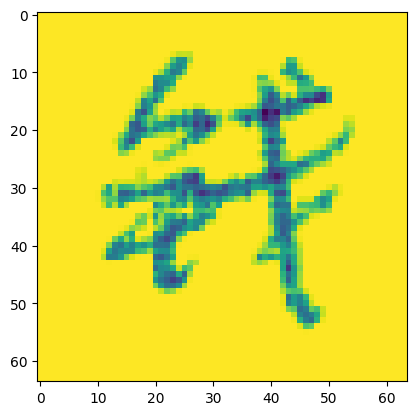

In [ ]:
plt.imshow(images_train[11324], interpolation='nearest')
plt.show()

In [ ]:
labels_train[11324]

163

In [ ]:
character_zip[163]

'钱'

# Data augmentation

In [ ]:
SHUFFLE_BUFFER_SIZE = 256

In [ ]:
def augment_data(X, Y):
  if tf.random.uniform(shape = []) < 0.5:
    X = 1.0 - X

  X = tf.image.random_contrast(X, 0.9, 1.1)
  X = tf.image.random_brightness(X, 0.05)

  return X, Y

In [ ]:
def prepare_dataset(X, Y, batch_size = 32, shuffle = False, augment = False):
  ds_X = tf.data.Dataset.from_tensor_slices(X)
  ds_Y = tf.data.Dataset.from_tensor_slices(Y)
  ds   = tf.data.Dataset.zip((ds_X, ds_Y))

  if shuffle:
    ds = ds.shuffle(SHUFFLE_BUFFER_SIZE)

  if augment:
    ds = ds.map(augment_data, num_parallel_calls = tf.data.AUTOTUNE)

  ds = ds.batch(batch_size)

  ds = ds.prefetch(buffer_size = tf.data.AUTOTUNE)

  return ds

In [ ]:
#train_ds = prepare_dataset(images_train_100, labels_train_100, batch_size = 32, shuffle = True, augment = True)
#valid_ds = prepare_dataset(images_valid_100, labels_valid_100, batch_size = 32)

train_ds = prepare_dataset(images_train, labels_train, batch_size = 16, shuffle = True, augment = True)
valid_ds = prepare_dataset(images_valid, labels_valid, batch_size = 16)

In [ ]:
for x in train_ds.take(2):
  print(x[0].shape)
  print(x[1].shape)

  #plt.imshow(x[0][0])

(16, 64, 64, 1)
(16,)
(16, 64, 64, 1)
(16,)


# Analyse model results

In [ ]:
def show_train_summary(model_name, history, epochs):
  history_dict = history.history

  fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Train/Val accuracy", "Train/Val loss"))

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["accuracy"],
                           mode = "lines+markers",
                           name = "Train Accuracy"),
                           row = 1, col = 1)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["val_accuracy"],
                           mode = "lines+markers",
                           name = "Validation Accuracy"),
                           row = 1, col = 1)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["loss"],
                           mode = "lines+markers",
                           name = "Train Loss"),
                           row = 1, col = 2)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["val_loss"],
                           mode = "lines+markers",
                           name = "Validation Loss"),
                           row = 1, col = 2)

  fig.update_layout(height = 500, width = 1100,
                    title_text = f"Model {model_name} training summary",
                    title_x = 0.5,
                    title_xanchor = 'center',
                    legend = dict(
                        orientation = 'h',
                        yanchor = 'bottom',
                        y = -0.2,
                        xanchor = 'center',
                        x = 0.5
        ))
  fig.update_xaxes(title_text = "Epochs")
  fig.update_yaxes(title_text = "Accuracy", row = 1, col = 1)
  fig.update_yaxes(title_text = "Loss", row = 1, col = 2)

  fig.show()

In [ ]:
def analyse_results(pred_class, true_class, key_dict, n_errors):
  class_names = [key_dict[i] for i in range(0, 172)]

  matrix_confusion = confusion_matrix(true_class, pred_class)
  df_confusion     = pd.DataFrame(matrix_confusion, index = class_names, columns = class_names)

  errors                = df_confusion.sum(axis = 1) - np.diag(df_confusion)
  wrong_classes_indices = np.where(errors > n_errors)[0]

  for index in wrong_classes_indices:
      character   = class_names[index]
      error_count = errors.iloc[index]

      confused_with_indices = np.where(df_confusion.iloc[index] > 0)[0]
      confused_with         = [class_names[i] for i in confused_with_indices if i != index]

      print(f"Ієрогліф: {character}, Кількість помилок: {error_count}, Поплутані ієрогліфи: {', '.join(confused_with)}")

# Best model 2 15 epoch

In [ ]:
model_pool_2 = tf.keras.models.Sequential([
    keras.layers.Input(shape = (64, 64, 1)),  # Explicit Input layer
    keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(172, activation='softmax')
])

In [ ]:
model_pool_2.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_pool_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 172)                 │          44,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121,196 (4.28 MB)

 Trainable params: 1,120,940 (4.28 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
history_pool_2 = model_pool_2.fit(train_ds, batch_size = 16, epochs = 15, validation_data = valid_ds)
history_pool_2

Epoch 1/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - accuracy: 0.2089 - loss: 3.6425 - val_accuracy: 0.8546 - val_loss: 0.5386
Epoch 2/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.7957 - loss: 0.7056 - val_accuracy: 0.8984 - val_loss: 0.3581
Epoch 3/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.8676 - loss: 0.4577 - val_accuracy: 0.9318 - val_loss: 0.2419
Epoch 4/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.8963 - loss: 0.3527 - val_accuracy: 0.9414 - val_loss: 0.2000
Epoch 5/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.9136 - loss: 0.2964 - val_accuracy: 0.9502 - val_loss: 0.1788
Epoch 6/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.9245 - loss: 0.2618 - val_accuracy: 0.9585 - val_loss: 0.1527
Epoch 7/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.9274 - loss: 0.2444 - val_accuracy: 0.9568 - val_loss: 0.1571
Epoch 8/15
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.9364 - loss: 

In [ ]:
show_train_summary("GlobalAveragePooling2D", history_pool_2, list(range(1, 15 + 1)))

In [ ]:
model_pool_2.evaluate(images_test, labels_test)

764/764 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9592 - loss: 0.1874


[0.17998003959655762, 0.9553717374801636]

In [ ]:
predictions_pool_2 = model_pool_2.predict(images_test)

764/764 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
pred_labels_pool_2 = np.argmax(predictions_pool_2, axis=1)

In [ ]:
analyse_results(pred_labels_pool_2, labels_test, character_zip, 19)

Ієрогліф: 同, Кількість помилок: 28, Поплутані ієрогліфи: 习, 们, 国, 日, 月
Ієрогліф: 回, Кількість помилок: 38, Поплутані ієрогліфи: 习, 们, 写, 四, 国, 日, 月, 这
Ієрогліф: 月, Кількість помилок: 21, Поплутані ієрогліфи: 习, 分, 四, 日
Ієрогліф: 朋, Кількість помилок: 20, Поплутані ієрогліфи: 明, 的, 租, 脑


In [ ]:
model_pool_2.save('/content/drive/MyDrive/Дипломна_робота/best_model_pool_2_15.keras')

# Best model 2 30 epoch

In [ ]:
model_pool_2 = tf.keras.models.Sequential([
    keras.layers.Input(shape = (64, 64, 1)),  # Explicit Input layer
    keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(172, activation='softmax')
])

In [ ]:
model_pool_2.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_pool_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 172)                 │          44,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121,196 (4.28 MB)

 Trainable params: 1,120,940 (4.28 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
history_pool_2 = model_pool_2.fit(train_ds, batch_size = 16, epochs = 30, validation_data = valid_ds)
history_pool_2

Epoch 1/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 57s 10ms/step - accuracy: 0.2312 - loss: 3.5437 - val_accuracy: 0.8383 - val_loss: 0.5715
Epoch 2/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.7962 - loss: 0.7114 - val_accuracy: 0.9159 - val_loss: 0.2973
Epoch 3/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.8642 - loss: 0.4650 - val_accuracy: 0.9353 - val_loss: 0.2335
Epoch 4/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - accuracy: 0.8919 - loss: 0.3745 - val_accuracy: 0.9219 - val_loss: 0.2620
Epoch 5/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.9091 - loss: 0.3167 - val_accuracy: 0.9511 - val_loss: 0.1756
Epoch 6/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.9198 - loss: 0.2736 - val_accuracy: 0.9462 - val_loss: 0.1861
Epoch 7/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.9272 - loss: 0.2474 - val_accuracy: 0.9563 - val_loss: 0.1576
Epoch 8/30
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.9338 - loss: 

In [ ]:
show_train_summary("GlobalAveragePooling2D", history_pool_2, list(range(1, 30 + 1)))

In [ ]:
model_pool_2.evaluate(images_test, labels_test)

764/764 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9609 - loss: 0.1812


[0.1642047017812729, 0.9607762694358826]

In [ ]:
predictions_pool_2 = model_pool_2.predict(images_test)

764/764 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
pred_labels_pool_2 = np.argmax(predictions_pool_2, axis=1)

In [ ]:
analyse_results(pred_labels_pool_2, labels_test, character_zip, 19)

Ієрогліф: 回, Кількість помилок: 24, Поплутані ієрогліфи: 们, 写, 四, 国, 日, 月, 果, 西, 这
Ієрогліф: 来, Кількість помилок: 20, Поплутані ієрогліфи: 买, 块, 字, 我, 本, 米, 苹, 茶, 菜


In [ ]:
model_pool_2.save('/content/drive/MyDrive/Дипломна_робота/best_model_pool_2_30.keras')